# **Crop Disease Detection**

## **Introduction**:

> #### *Problem Statement*: 
> > Few farmers are facing with issue with in the farm. There are lots of problems in the agricultural sector in the perspective of the farmer, but we can help them by integrating the AI Technology. Even after selecting and growing the crop in the field, few
crop diseases are not identified by the farmer which results to decrease in the crop yield. This is the main problem in the field so we are going to solve this issue by developing a model which can recognize the disease that is caused by the input of an image of the diseased plant. By
tackling this, we can increase the crop yield and maintain the crop production.

> #### *Overview of the project*:
> > This project involves building and loading the data, **Plant Village Dataset**, Exploratory Data Analysis, Model Building and Training.  
> #### *Goal of this project*:
> > The goal of this project is to build individual models for each vegetable as per the user wish and to observe the performance metrics of the model
> #### *Result*: 
> > With this we can hence use the model for any web application for crop managment systems or Crop Disease detection system

### Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
import os
from tensorflow.keras.utils import image_dataset_from_directory
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageEnhance
import random
import cv2
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import tensorflow_hub as hub
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow_addons'

## 1. Exploratory Data Analysis

### Defining a function to get the path for folder paths

In [ ]:
def get_path(plant_dir:str, dir_test:str):
    if dir_test == 'Test':
        return '/kaggle/input/plant-village-dataset-updated/' + plant_dir + '/Test'
    elif dir_test == 'Train':
        return '/kaggle/input/plant-village-dataset-updated/' + plant_dir + '/Train'
    elif dir_test == 'Valid':
        return '/kaggle/input/plant-village-dataset-updated/' + plant_dir + '/Val'
    
plant_dirs = os.listdir("/kaggle/input/plant-village-dataset-updated")
plant_dirs

### Printing the information about the Training set, the directories and the images

In [3]:
img_dim = (256,256)
batch_size = 32
num_channels = 3
input_size = (batch_size, img_dim[0], img_dim[1], num_channels)
train_dataset = {}

print("-_-_-_-_-_-_-_-_-_-_Images & Classes for Training-_-_-_-_-_-_-_-_-_-_")
for plant in plant_dirs:
    print('>>> No of Images & Classes in "{}" directory'.format(plant))
    train_dataset[plant] = image_dataset_from_directory(get_path(plant, "Train"),
                                                        shuffle=True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = img_dim,
                                                        batch_size = batch_size)

-_-_-_-_-_-_-_-_-_-_Images & Classes for Training-_-_-_-_-_-_-_-_-_-_


NameError: name 'plant_dirs' is not defined

### Printing the disease names of each plant

In [ ]:
classes  ={}
for plant in plant_dirs:
    print(">>> Classes in {} dataset :-".format(plant))
    classes[plant] = []
    for num, cat in enumerate(train_dataset[plant].class_names, start=1):
        classes[plant].append(cat)
        print(num, cat)
    print("\n")

### Plotting few random samples from each plant directory

In [ ]:
for plant in plant_dirs:
    print('>>>> Sample Images of "{}" dataset'.format(plant))
    plt.figure(figsize=(14,5))
    for image_batch, image_label in train_dataset[plant].take(1):
        for i in range(10):
            plt.subplot(2,5,i+1)
            plt.imshow(image_batch[i].numpy().astype('uint8'))
            plt.title(classes[plant][image_label[i]])
            plt.axis('off')
        plt.show()
    print("\n\n")

### Plotting the standardized images for randome plant leaf images

In [ ]:
def std_img(img):
    img_flat = img.reshape(-1,3)
    scaler = StandardScaler()
    img_std = scaler.fit_transform(img_flat)
    img_std = img_std.reshape(256,256,3)
    return img_std

tomato_img = []
tomato_label = []
for img,label in train_dataset["Tomato"].take(1):
    for i in range(5):
        tomato_img.append(img[i])
        tomato_label.append(classes["Tomato"][label[i]])
        
for i in range(5):        
    nik = np.array(tomato_img[i]).astype('uint8')
    img_std = std_img(nik)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(nik)
    plt.title("Tomato "+tomato_label[i])
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(img_std)
    plt.title('Standardized Image')
    plt.axis('off')
plt.show()

### Plotting the number of total images of each plant directory

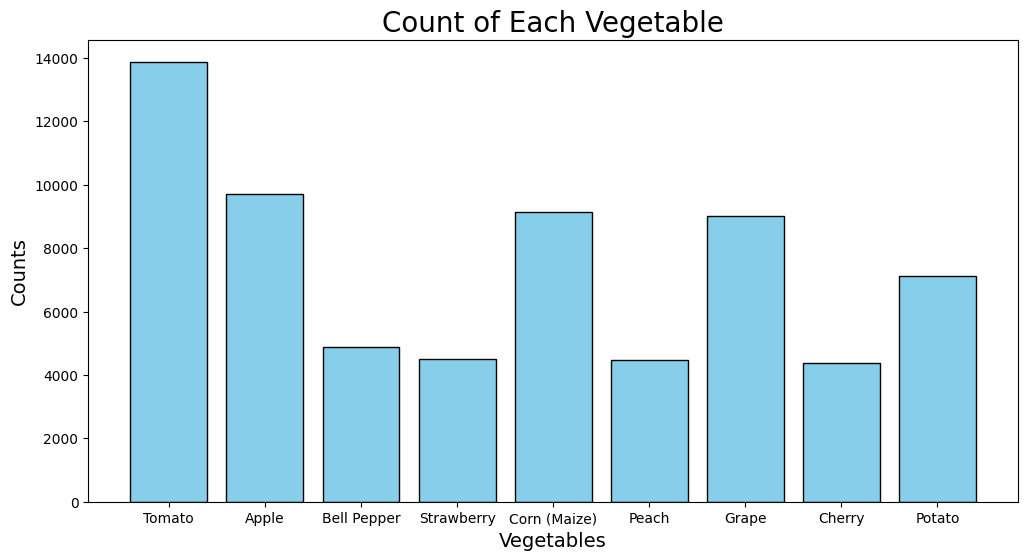

In [4]:
plants={}
dis = {}
for plant in os.listdir("/kaggle/input/plant-village-dataset-updated"):
    plant_count = 0
    path = f"/kaggle/input/plant-village-dataset-updated/{plant}/"
    for disease in os.listdir(path+"Train"):
        dis_count = 0
        for file in os.listdir(path+f"Train/{disease}"):
            plant_count+=1
            dis_count +=1
        dis[plant+" "+disease] = dis_count
    for disease in os.listdir(path+"Test"):
        for file in os.listdir(path+f"Test/{disease}"):
            plant_count+=1    
    for disease in os.listdir(path+"Val"):
        for file in os.listdir(path+f"Val/{disease}"):
            plant_count+=1
    plants[plant] = plant_count
    
categories = list(plants.keys())
counts = list(plants.values())

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(categories, counts, color='skyblue', edgecolor='black')
plt.xlabel('Vegetables', fontsize=14)
plt.ylabel('Counts', fontsize= 14)
plt.title('Count of Each Vegetable', fontsize=20)
plt.xticks(ha='center')  # Rotate x-axis labels for better readability
plt.show()

### Plotting the number of diseases per each plant

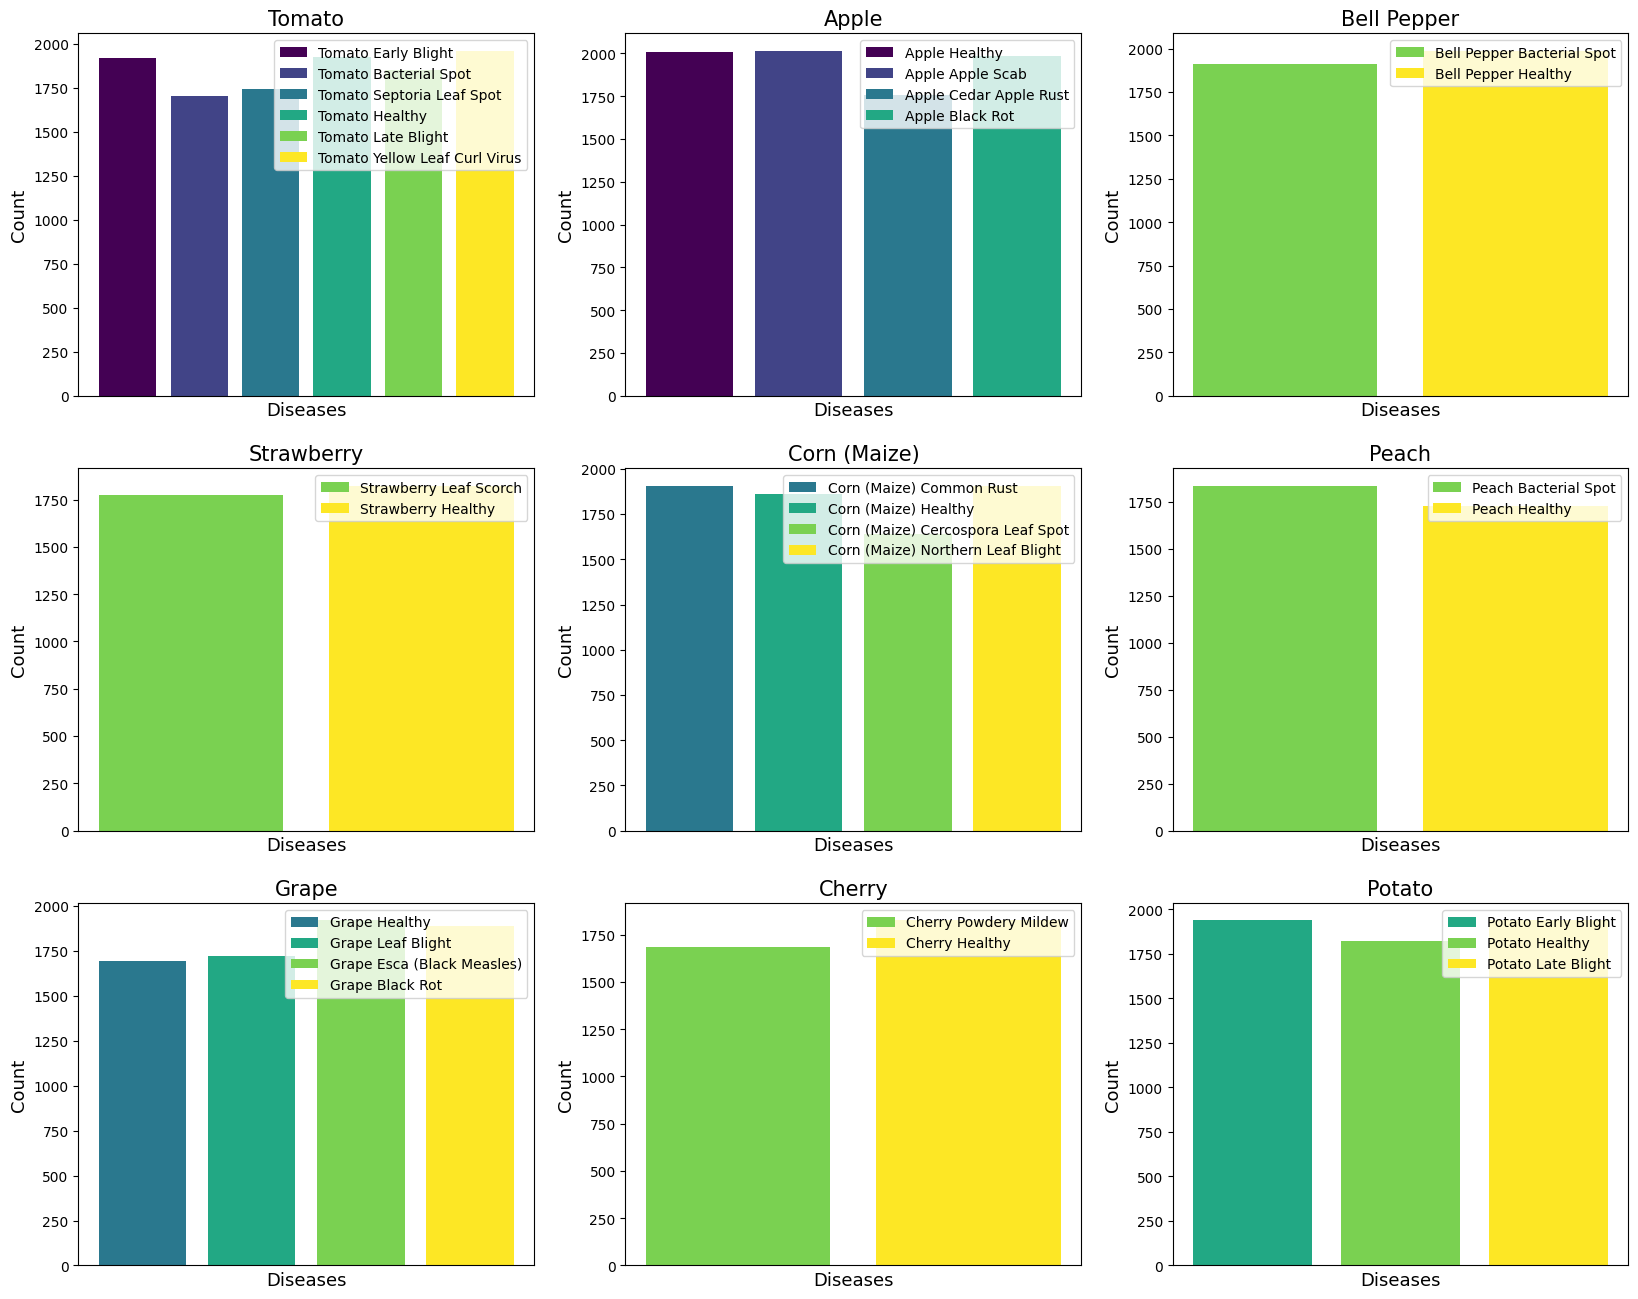

In [5]:
plts = os.listdir("/kaggle/input/plant-village-dataset-updated")
x = list(dis.keys())
y = list(dis.values())
colors = plt.cm.viridis(np.linspace(0, 1, 6)) 
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
axes[0, 0].bar(x[:6], y[:6], color=colors[:6], label=x[:6])
axes[0, 1].bar(x[6:10], y[6:10], color=colors[:4], label=x[6:10])
axes[0, 2].bar(x[10:12], y[10:12], color=colors[-2:], label=x[10:12])
axes[1, 0].bar(x[12:14], y[12:14], color=colors[-2:], label=x[12:14])
axes[1, 1].bar(x[14:18], y[14:18], color=colors[-4:], label=x[14:18])
axes[1, 2].bar(x[18:20], y[18:20], color=colors[-2:], label=x[18:20])
axes[2, 0].bar(x[20:24], y[20:24], color=colors[-4:], label=x[20:24])
axes[2, 1].bar(x[24:26], y[24:26], color=colors[-2:], label=x[24:26])
axes[2, 2].bar(x[26:29], y[26:29], color=colors[-3:], label=x[26:29])
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        axes[i, j].set_xticks([])
        axes[i, j].set_xlabel('Diseases', fontsize=13)
        axes[i, j].set_ylabel('Count', fontsize=13)
        axes[i, j].set_title(plts[idx], fontsize=15)
        axes[i, j].legend()

plt.show()

### Plotting the 32X32 patch format of a image

In [6]:
image_size = 224 
img_height, img_width = 512, 512
patch_size = 32
num_patches = (image_size // patch_size) ** 2
class Patches(layers.Layer):
    
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        super(Patches, self).__init__()
        self.patch_size = patch_size
    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
    
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(4, 4))

target = "/kaggle/input/plant-village-dataset-updated/Apple/Train/Black Rot"
random_num = random.choice(os.listdir(target))
image = mpimg.imread("/kaggle/input/plant-village-dataset-updated/Apple/Train/Black Rot/" + random_num)
plt.imshow(image.astype("uint8"))
plt.axis("off")
resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


NameError: name 'layers' is not defined

# **Model Development**

### Enter the plant name for which you want to develop the model, as the variable

plant = "Strawberry"

### Declaring the paths for the training, testing, validation path, labels for the given plant diseases and the output length

train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
out_len = len(out_labels)

### Declaring the batch size of 64 and the image size of 224X224 pixels


batch_size = 64
img_height = 224

### Declare the ImageDataGenerator for the train_datagen and test_datagen, val_datagen. For train_datagen the images are augumented and for all the three datagenerators the pixels are scaled

train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range=20,shear_range=0.15,horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

### Declaring the train, test and valid sets for the input to the model, making every image to be of the size 224X224 pixels


train_set = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 64,shuffle = True,class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,target_size = (224, 224),batch_size = 64,shuffle = False,class_mode = 'categorical')
test_set = val_datagen.flow_from_directory(test_path,target_size = (224, 224),batch_size = 64,shuffle = False,class_mode = 'categorical')

### Loading the pretrained VIT model with RESNET50 as backbone with 32 patch size and pretrained on ImageNet-21k dataset. Building a classifier head over the pretrained VIT Model with out_len as the output shape which is equal to the number of disease of plant

fe_L2 = hub.KerasLayer("https://tfhub.dev/sayakpaul/vit_r50_l32_fe/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])

### Training the model for 10 epochs

epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

### Saving the model with plant name

model_name = plant+"_model"
VIT.save(model_name)

### Predicting the test_set for the model

Y_pred = VIT.predict(test_set, steps = len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)

### Plotting the confusion matrix for given y_pred and y_true

cf = confusion_matrix(test_set.classes, y_pred)
list = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',xticklabels=out_labels,yticklabels=out_labels)
plt.title(f'Confusion Matrix of {plant} with Accuracy : {accuracy_score(test_set.classes, y_pred) * 100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt_name = plant+"_CF.png"
plt.savefig(plt_name)
plt.show()

### Printing the classification report

print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_>>>>Classification Report<<<<-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print(classification_report(test_set.classes, y_pred, target_names=out_labels))

### Plotting the model Accuracy and Loss Graphs

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

**VEGETABLE ONE**

In [ ]:
plant = "Tomato"

In [ ]:
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
out_len = len(out_labels)

In [ ]:
batch_size = 64
img_height = 224

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range=20,shear_range=0.15,horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,target_size = (224,224),batch_size = 64,shuffle = True,class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,target_size = (224, 224),batch_size = 64,shuffle = False,class_mode = 'categorical')
test_set = val_datagen.flow_from_directory(test_path,target_size = (224, 224),batch_size = 64,shuffle = False,class_mode = 'categorical')

**VIT-R26-S32**

In [ ]:
import tensorflow_hub as hub
#model = tf.keras.Sequential([
#    hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-r26-s32-medaug-classification/1")
#])
#predictions = model.predict(images) 


fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-r26-s32-medaug-classification/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])

In [ ]:
epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

In [ ]:
model_name = plant+"_model"
VIT.save(model_name)

In [ ]:
Y_pred = VIT.predict(test_set, steps = len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)

cf = confusion_matrix(test_set.classes, y_pred)
list = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',xticklabels=out_labels,yticklabels=out_labels)
plt.title(f'Confusion Matrix of {plant} with Accuracy : {accuracy_score(test_set.classes, y_pred) * 100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt_name = plant+"_CF.png"
plt.savefig(plt_name)
plt.show()


print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_>>>>Classification Report<<<<-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print(classification_report(test_set.classes, y_pred, target_names=out_labels))

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#3 clients 

import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 3
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-r26-s32-medaug-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 5
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-r26-s32-medaug-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#10 clients

import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 10
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-r26-s32-medaug-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


**VIT-L16**

In [ ]:
import tensorflow_hub as hub
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-l16-classification/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])

In [ ]:
epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

model_name = plant+"_model"
VIT.save(model_name)

In [ ]:
Y_pred = VIT.predict(test_set, steps = len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)

cf = confusion_matrix(test_set.classes, y_pred)
list = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',xticklabels=out_labels,yticklabels=out_labels)
plt.title(f'Confusion Matrix of {plant} with Accuracy : {accuracy_score(test_set.classes, y_pred) * 100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt_name = plant+"_CF.png"
plt.savefig(plt_name)
plt.show()


print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_>>>>Classification Report<<<<-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print(classification_report(test_set.classes, y_pred, target_names=out_labels))

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#3 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 3
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-l16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#5 clients

import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 5
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-l16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#10 clients

import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 10
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-l16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


**VIT-B16**

In [ ]:
import tensorflow_hub as hub
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])


epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

model_name = plant+"_model"
VIT.save(model_name)

In [ ]:
Y_pred = VIT.predict(test_set, steps = len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)

cf = confusion_matrix(test_set.classes, y_pred)
list = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',xticklabels=out_labels,yticklabels=out_labels)
plt.title(f'Confusion Matrix of {plant} with Accuracy : {accuracy_score(test_set.classes, y_pred) * 100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt_name = plant+"_CF.png"
plt.savefig(plt_name)
plt.show()


print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_>>>>Classification Report<<<<-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print(classification_report(test_set.classes, y_pred, target_names=out_labels))

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#3 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 3
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#5 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 5
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#10 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 10
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


**VIT_S16**

In [ ]:
import tensorflow_hub as hub
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-s16-classification/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])


epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

model_name = plant+"_model"
VIT.save(model_name)

In [ ]:
Y_pred = VIT.predict(test_set, steps = len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)

cf = confusion_matrix(test_set.classes, y_pred)
list = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',xticklabels=out_labels,yticklabels=out_labels)
plt.title(f'Confusion Matrix of {plant} with Accuracy : {accuracy_score(test_set.classes, y_pred) * 100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt_name = plant+"_CF.png"
plt.savefig(plt_name)
plt.show()


print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_>>>>Classification Report<<<<-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print(classification_report(test_set.classes, y_pred, target_names=out_labels))

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#3 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 3
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-s16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#5 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 5
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-s16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#10 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 10
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-s16-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


**VIT-B32**

In [ ]:
import tensorflow_hub as hub
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])


epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

model_name = plant+"_model"
VIT.save(model_name)

In [ ]:
Y_pred = VIT.predict(test_set, steps = len(test_set) )
y_pred = np.argmax(Y_pred, axis=1)

cf = confusion_matrix(test_set.classes, y_pred)
list = os.listdir(f"/kaggle/input/plant-village-dataset-updated/{plant}/Train")
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues',xticklabels=out_labels,yticklabels=out_labels)
plt.title(f'Confusion Matrix of {plant} with Accuracy : {accuracy_score(test_set.classes, y_pred) * 100:.2f}%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt_name = plant+"_CF.png"
plt.savefig(plt_name)
plt.show()


print('-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_>>>>Classification Report<<<<-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_')
print(classification_report(test_set.classes, y_pred, target_names=out_labels))

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
val_acc = r.history['val_accuracy']
val_loss = r.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [ ]:
#3 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 3
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#5 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 5
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
#10 clients
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import os

# Paths and parameters
plant = "Tomato"
train_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Train"
val_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Val"
test_path = f"/kaggle/input/plant-village-dataset-updated/{plant}/Test"
out_labels = os.listdir(train_path)
out_len = len(out_labels)
batch_size = 64
img_height = 224
NUM_CLIENTS = 10
NUM_ROUNDS = 4
EPOCHS_PER_CLIENT = 2

# Data generators
datagen = ImageDataGenerator(rescale=1./255.)

# Create the datasets
train_set = datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=batch_size, shuffle=True, class_mode='categorical')
val_set = datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')
test_set = datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=batch_size, shuffle=False, class_mode='categorical')

# Function to create client-specific data generators
def create_client_data_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_gen = datagen.flow_from_directory(
            train_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=True,
            class_mode='categorical'
        )
        client_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_gen.samples = len(client_gen.filenames)
        client_generators.append(client_gen)
    return client_generators

# Function to create client-specific validation data generators
def create_client_val_generators(num_clients, dataset, batch_size):
    total_batches = len(dataset)
    client_val_generators = []
    for i in range(num_clients):
        start_idx = i * total_batches // num_clients
        end_idx = (i + 1) * total_batches // num_clients
        client_val_gen = datagen.flow_from_directory(
            val_path,
            target_size=(224, 224),
            batch_size=batch_size,
            shuffle=False,
            class_mode='categorical'
        )
        client_val_gen.filenames = dataset.filenames[start_idx:end_idx]
        client_val_gen.samples = len(client_val_gen.filenames)
        client_val_generators.append(client_val_gen)
    return client_val_generators

# Create client data generators
client_train_generators = create_client_data_generators(NUM_CLIENTS, train_set, batch_size)
client_val_generators = create_client_val_generators(NUM_CLIENTS, val_set, batch_size)

# Pretrained ViT model
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1", input_shape=(224, 224, 3), trainable=False, name="Pre_Trained_")

def create_model():
    model = tf.keras.Sequential([
        fe_L2,
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(out_len, activation="softmax", name="output_layer")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])
    return model

# Federated training loop
global_model = create_model()
for round_num in range(NUM_ROUNDS):
    client_models = []
    client_accuracies = []
    for client_index, client_gen in enumerate(client_train_generators):
        client_model = create_model()
        client_model.set_weights(global_model.get_weights())
        client_model.fit(client_gen, epochs=EPOCHS_PER_CLIENT)

        # Evaluate on client-specific validation data
        val_loss, val_acc = client_model.evaluate(client_val_generators[client_index])
        client_accuracies.append(val_acc)
        print(f'Client {client_index + 1}: Validation Accuracy = {val_acc:.4f}')

        client_models.append(client_model)

    # FedAvg aggregation
    new_weights = []
    for layer_index in range(len(global_model.get_weights())):
        layer_weights = np.mean([client_models[i].get_weights()[layer_index] for i in range(NUM_CLIENTS)], axis=0)
        new_weights.append(layer_weights)
    global_model.set_weights(new_weights)

    # Evaluate global model
    val_loss, val_acc = global_model.evaluate(val_set)
    print(f'Round {round_num + 1}: Validation Loss = {val_loss:.4f}, Validation Accuracy = {val_acc:.4f}')

# Final evaluation on the test set
test_loss, test_acc = global_model.evaluate(test_set)
print(f'Test Loss = {test_loss:.4f}, Test Accuracy = {test_acc:.4f}')


In [ ]:
import tensorflow_hub as hub
fe_L2 = hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/vision-transformer/TensorFlow2/vit-b32-classification/1",input_shape = (224,224,3),trainable = False,name = "Pre_Trained_")
VIT = tf.keras.Sequential([
    fe_L2,
    layers.Dense(128,activation = "relu"),
    layers.Dropout(0.5),
    layers.Dense(out_len, activation = "softmax", name = "output_layer")
])

VIT.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ["accuracy"])


epochs = 10
r=VIT.fit(train_set,epochs = epochs,validation_data = val_set,steps_per_epoch=len(train_set),validation_steps = len(val_set))

model_name = plant+"_model"
VIT.save(model_name)

import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/spsayakpaul/bit-resnet/TensorFlow2/bit-resnet152x2-224-classification/1")
])
predictions = model.predict(images) 

In [ ]:

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Path to VGG16 weights
weights_path = "/kaggle/input/vgg16/tensorflow2/default/1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

# ✅ Verify weights path
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"❌ Weights file not found at: {weights_path}")

# ✅ Dataset path
dataset_path = "/kaggle/input/plant-village-dataset-updated/"

# 🔍 Detect dataset structure
subdirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
if len(subdirs) == 1:  # If there's a single subdirectory, use it
    dataset_path = os.path.join(dataset_path, subdirs[0])
    print(f"📂 Adjusted dataset path: {dataset_path}")

train_path = os.path.join(dataset_path, "Apple/Train")
valid_path = os.path.join(dataset_path, "Apple/Val")

# ✅ Check if Train and Val folders exist
if not (os.path.exists(train_path) and os.path.exists(valid_path)):
    raise FileNotFoundError(f"❌ 'Train' and 'Val' folders not found in: {dataset_path}")

print("✅ Dataset structure is correct!\n")

# ✅ ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

# ✅ Load datasets
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# ✅ Load VGG16 base model
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# ✅ Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_dataset.class_indices), activation='softmax')(x)

# ✅ Final model
model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(train_dataset, epochs=3, validation_data=valid_dataset)

# ✅ Save model
model.save("plant_disease_vgg16_model.h5")

# ✅ Evaluate model
loss, accuracy = model.evaluate(valid_dataset)
print(f"\n✅ Validation Accuracy: {accuracy:.2%}")
print(f"❌ Validation Loss: {loss:.4f}")

# ✅ Generate predictions
y_pred = np.argmax(model.predict(valid_dataset), axis=1)
y_true = valid_dataset.classes

# ✅ Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=valid_dataset.class_indices.keys()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_dataset.class_indices.keys(),
            yticklabels=valid_dataset.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Plot accuracy and loss
plt.figure(figsize=(14, 6))

# 🔹 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 🔹 Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
!pip install --upgrade pip setuptools wheel




In [ ]:
!pip install --upgrade jax jaxlib tensorflow


In [ ]:
#RESNET 26
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D, BatchNormalization, ReLU, Add, Input, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Dataset path
dataset_path = "/kaggle/input/plant-village-dataset-updated/"

# 🔍 Detect dataset structure
subdirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
if len(subdirs) == 1:
    dataset_path = os.path.join(dataset_path, subdirs[0])
    print(f"📂 Adjusted dataset path: {dataset_path}")

train_path = os.path.join(dataset_path, "Apple/Train")
valid_path = os.path.join(dataset_path, "Apple/Val")

# ✅ Check if Train and Val folders exist
if not (os.path.exists(train_path) and os.path.exists(valid_path)):
    raise FileNotFoundError(f"❌ 'Train' and 'Val' folders not found in: {dataset_path}")

print("✅ Dataset structure is correct!\n")

# ✅ ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

# ✅ Load datasets
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=64,
    class_mode='sparse',
    shuffle=True
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)

# ✅ ResNet-26 Block
def resnet_block(x, filters, kernel_size=3, stride=1):
    shortcut = x
    x = Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel_size, strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# ✅ Build ResNet-26 Model
def build_resnet26(input_shape=(256, 256, 3), num_classes=10):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
   
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
    x = resnet_block(x, 64)
   
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 128)
    x = resnet_block(x, 128)
   
    x = resnet_block(x, 256, stride=2)
    x = resnet_block(x, 256)
    x = resnet_block(x, 256)
   
    x = resnet_block(x, 512, stride=2)
    x = resnet_block(x, 512)
    x = resnet_block(x, 512)
   
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(train_dataset.class_indices), activation='softmax')(x)
   
    model = Model(inputs, outputs)
    return model

model = build_resnet26(input_shape=(256, 256, 3), num_classes=len(train_dataset.class_indices))

# ✅ Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(train_dataset, epochs=3, validation_data=valid_dataset)

# ✅ Save model
model.save("plant_disease_resnet26_model.h5")

# ✅ Evaluate model
loss, accuracy = model.evaluate(valid_dataset)
print(f"\n✅ Validation Accuracy: {accuracy:.2%}")
print(f"❌ Validation Loss: {loss:.4f}")

# ✅ Generate predictions
y_pred = np.argmax(model.predict(valid_dataset), axis=1)
y_true = valid_dataset.classes

# ✅ Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=valid_dataset.class_indices.keys()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_dataset.class_indices.keys(),
            yticklabels=valid_dataset.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Plot accuracy and loss
plt.figure(figsize=(14, 6))

# 🔹 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 🔹 Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

✅ Dataset structure is correct!

Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 9030s 74s/step - accuracy: 0.6568 - loss: 0.9293 - val_accuracy: 0.2267 - val_loss: 38.0331
Epoch 2/3
 97/122 ━━━━━━━━━━━━━━━━━━━━ 29:40 71s/step - accuracy: 0.8738 - loss: 0.3702

**VGG16**

In [ ]:
# INCEPTION V3
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Path to InceptionV3 weights
weights_path = "/kaggle/input/inception-v3/tensorflow2/default/1/inception_v3_weights_tf_dim_ordering_tf_kernels_notop(1).h5"

# ✅ Verify weights path
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"❌ Weights file not found at: {weights_path}")

# ✅ Dataset path
dataset_path = "/kaggle/input/plant-village-dataset-updated/"

# 🔍 Detect dataset structure
subdirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
if len(subdirs) == 1:  # If there's a single subdirectory, use it
    dataset_path = os.path.join(dataset_path, subdirs[0])
    print(f"📂 Adjusted dataset path: {dataset_path}")

train_path = os.path.join(dataset_path, "Apple/Train")
valid_path = os.path.join(dataset_path, "Apple/Val")

# ✅ Check if Train and Val folders exist
if not (os.path.exists(train_path) and os.path.exists(valid_path)):
    raise FileNotFoundError(f"❌ 'Train' and 'Val' folders not found in: {dataset_path}")

print("✅ Dataset structure is correct!\n")

# ✅ ImageDataGenerator for preprocessing
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

# ✅ Load datasets
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=64,
    class_mode='sparse',
    shuffle=True
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)

# ✅ Load InceptionV3 base model
base_model = InceptionV3(weights=weights_path, include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# ✅ Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_dataset.class_indices), activation='softmax')(x)

# ✅ Final model
model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(train_dataset, epochs=3, validation_data=valid_dataset)

# ✅ Save model
model.save("plant_disease_inceptionv3_model.h5")

# ✅ Evaluate model
loss, accuracy = model.evaluate(valid_dataset)
print(f"\n✅ Validation Accuracy: {accuracy:.2%}")
print(f"❌ Validation Loss: {loss:.4f}")

# ✅ Generate predictions
y_pred = np.argmax(model.predict(valid_dataset), axis=1)
y_true = valid_dataset.classes

# ✅ Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=valid_dataset.class_indices.keys()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_dataset.class_indices.keys(),
            yticklabels=valid_dataset.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Plot accuracy and loss
plt.figure(figsize=(14, 6))

# 🔹 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 🔹 Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

✅ Dataset structure is correct!

Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 3634s 30s/step - accuracy: 0.4714 - loss: 1.2463 - val_accuracy: 0.8855 - val_loss: 0.6110
Epoch 2/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 3687s 30s/step - accuracy: 0.8214 - loss: 0.6020 - val_accuracy: 0.9187 - val_loss: 0.3439
Epoch 3/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 3633s 30s/step - accuracy: 0.8798 - loss: 0.3825 - val_accuracy: 0.9347 - val_loss: 0.2505
28/28 ━━━━━━━━━━━━━━━━━━━━ 664s 24s/step - accuracy: 0.9279 - loss: 0.2650

✅ Validation Accuracy: 93.47%
❌ Validation Loss: 0.2505
28/28 ━━━━━━━━━━━━━━━━━━━━ 667s 24s/step

📊 Classification Report:
                  precision    recall  f1-score   support

      Apple Scab       0.89      0.93      0.91       453
       Black Rot       0.99      0.93      0.96       447
Cedar Apple Rust       0.96      0.89      0.93       396
         Healthy       0.91      0.98      0.94       451

        accuracy                           0.93      1747
       macro avg       0.94      0.93      0.93      1747
    weighted 

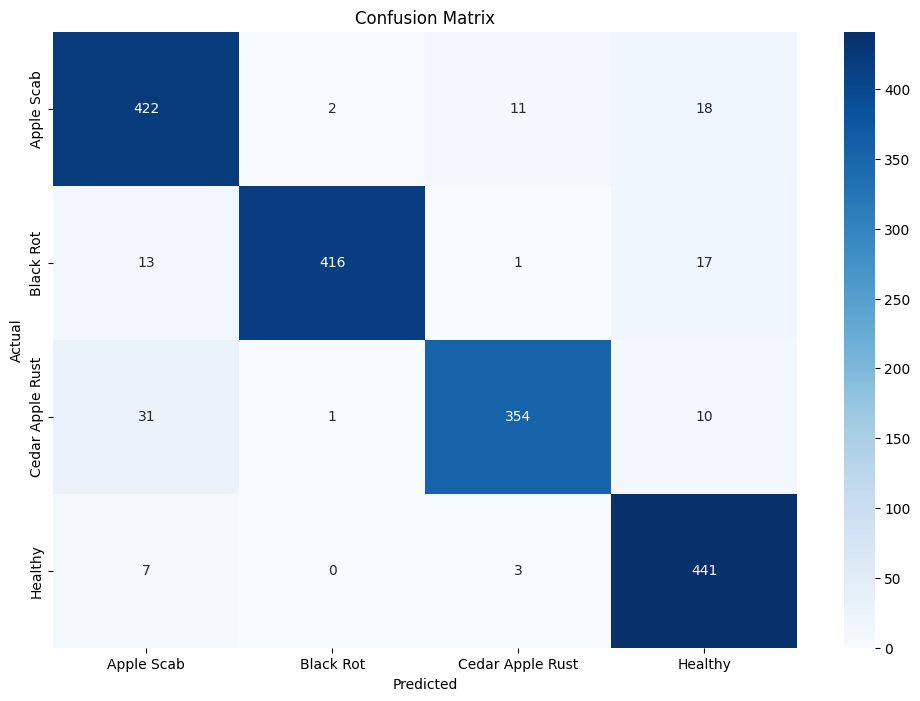

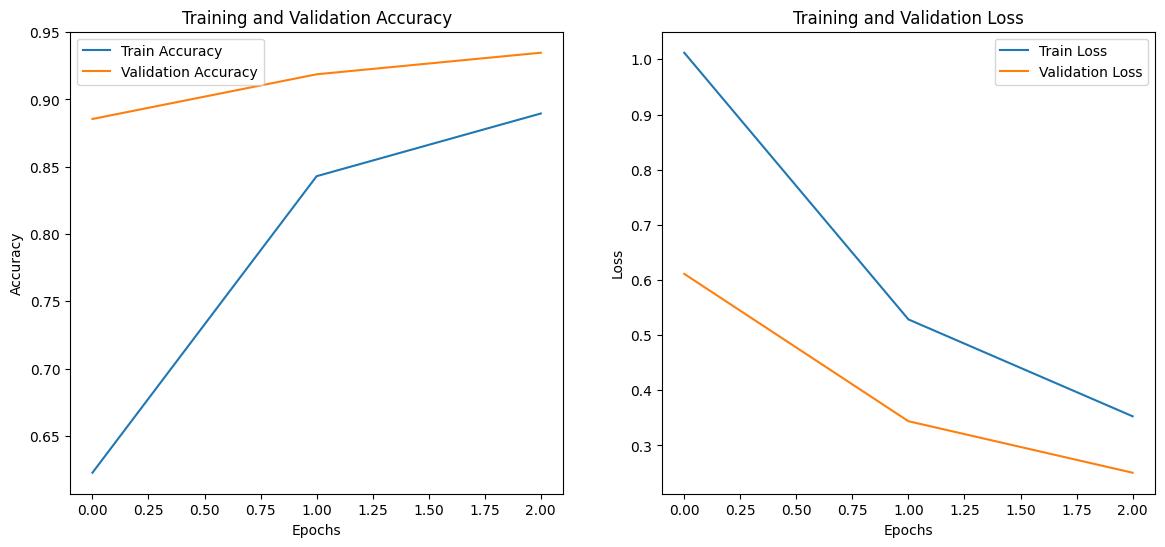

In [2]:
#VGG - 16 Classificat5ion
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Path to VGG16 weights
weights_path = "/kaggle/input/vgg16/tensorflow2/default/1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
if not os.path.exists(weights_path):
    raise FileNotFoundError(f"❌ Weights file not found at: {weights_path}")

# ✅ Dataset path
dataset_path = "/kaggle/input/plant-village-dataset-updated/"
subdirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]
if len(subdirs) == 1:
    dataset_path = os.path.join(dataset_path, subdirs[0])

train_path = os.path.join(dataset_path, "Apple/Train")
valid_path = os.path.join(dataset_path, "Apple/Val")

if not (os.path.exists(train_path) and os.path.exists(valid_path)):
    raise FileNotFoundError(f"❌ 'Train' and 'Val' folders not found in: {dataset_path}")

print("✅ Dataset structure is correct!\n")

# ✅ ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_dataset = train_datagen.flow_from_directory(
    train_path, target_size=(256, 256), batch_size=64, class_mode='sparse', shuffle=True
)
valid_dataset = valid_datagen.flow_from_directory(
    valid_path, target_size=(256, 256), batch_size=64, class_mode='sparse', shuffle=False
)

# ✅ Load VGG16 base model
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

# ✅ Add custom layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(train_dataset.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(train_dataset, epochs=3, validation_data=valid_dataset)

# ✅ Save model
model.save("plant_disease_vgg16_model.h5")

# ✅ Evaluate model
loss, accuracy = model.evaluate(valid_dataset)
print(f"\n✅ Validation Accuracy: {accuracy:.2%}")
print(f"❌ Validation Loss: {loss:.4f}")

# ✅ Generate predictions
y_pred = np.argmax(model.predict(valid_dataset), axis=1)
y_true = valid_dataset.classes

# ✅ Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=valid_dataset.class_indices.keys()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=valid_dataset.class_indices.keys(),
            yticklabels=valid_dataset.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Plot accuracy and loss
plt.figure(figsize=(14, 6))

# 🔹 Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# 🔹 Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



🔄 Round 1/1 🔄
🚀 Training Client 1
Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 3026s 25s/step - accuracy: 0.8436 - loss: 0.5195
Epoch 2/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 3032s 25s/step - accuracy: 0.8501 - loss: 0.4856
🚀 Training Client 2
Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
Epoch 1/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 2994s 25s/step - accuracy: 0.8439 - loss: 0.5219
Epoch 2/2
122/122 ━━━━━━━━━━━━━━━━━━━━ 3026s 25s/step - accuracy: 0.8443 - loss: 0.5045
Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
✅ Round 1 - Accuracy: 0.8987, Loss: 0.4043
Found 7771 images belonging to 4 classes.
Found 1747 images belonging to 4 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 670s 24s/step

📊 Performance Metrics:
✅ Accuracy: 89.8683%
✅ F1 Score: 0.8969
✅ Recall: 0.8970


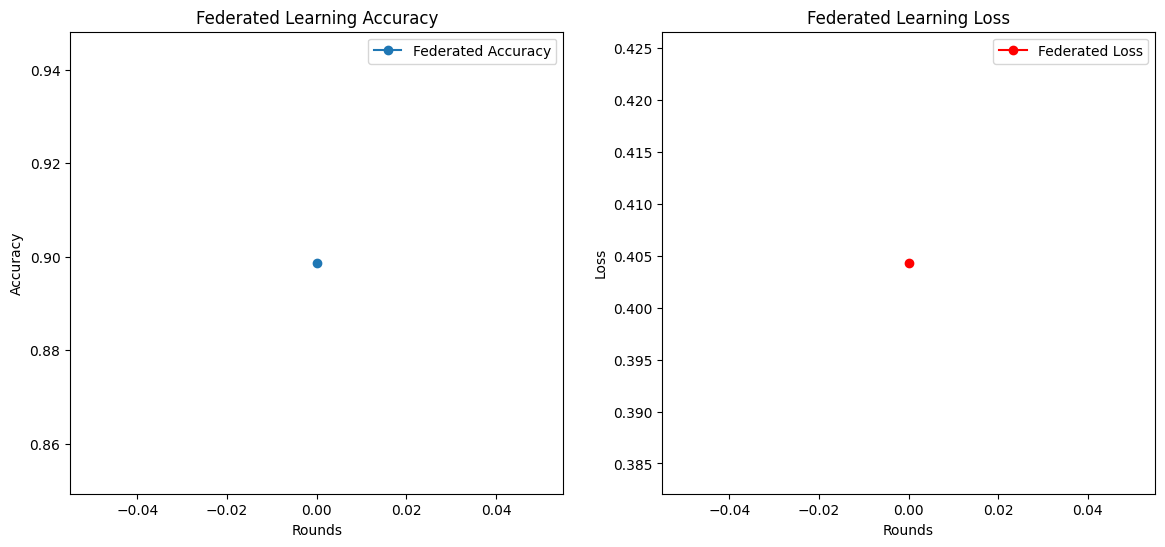

In [2]:
# SGD
# ✅ Import Libraries
import os
import numpy as np
import tensorflow as tf
# import tensorflow_federated as tff
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt

# ✅ Define Federated Learning Parameters
NUM_CLIENTS = 2   # Change this to increase clients
NUM_ROUNDS = 1   # Adjust number of federated rounds
LOCAL_EPOCHS = 2  # Number of local training epochs per client

# ✅ Load the Pretrained ResNet-26 Model
global_model = tf.keras.models.load_model("/kaggle/input/vgg-classification/tensorflow2/default/1/plant_disease_vgg16_model.h5")

# ✅ Prepare Dataset for Federated Learning
dataset_path = "/kaggle/input/plant-village-dataset-updated/"

# Get class names
class_names = sorted(os.listdir(os.path.join(dataset_path, "Apple/Train")))

# Federated Data Loading Function
def load_client_data(client_id):
    """Loads and preprocesses the data for a given client."""
    train_path = os.path.join(dataset_path, f"Apple/Train")
    valid_path = os.path.join(dataset_path, f"Apple/Val")

    # Create data generators
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
    valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

    train_dataset = train_datagen.flow_from_directory(
        train_path, target_size=(256, 256), batch_size=64, class_mode='sparse', shuffle=True
    )
    valid_dataset = valid_datagen.flow_from_directory(
        valid_path, target_size=(256, 256), batch_size=64, class_mode='sparse', shuffle=False
    )

    return train_dataset, valid_dataset

# ✅ Federated Client Training Function
def client_train(model, train_dataset):
    """Trains a local model for a given client and returns the updated weights."""
    model.compile(optimizer=SGD(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(train_dataset, epochs=LOCAL_EPOCHS, verbose=1)
    return model.get_weights()

# ✅ Federated Training Loop
def federated_training(global_model, num_clients, num_rounds):
    """Trains the model using Federated Learning with SGD."""
    history = {"accuracy": [], "loss": []}
    
    for round_num in range(num_rounds):
        print(f"\n🔄 Round {round_num + 1}/{num_rounds} 🔄")
        client_weights = []

        # Train each client independently
        for client_id in range(num_clients):
            print(f"🚀 Training Client {client_id + 1}")
            train_dataset, _ = load_client_data(client_id)
            local_model = tf.keras.models.clone_model(global_model)
            local_model.set_weights(global_model.get_weights())

            # Train the client model
            updated_weights = client_train(local_model, train_dataset)
            client_weights.append(updated_weights)

        # Aggregate client weights (FedAvg)
        new_weights = [np.mean([client_weights[j][i] for j in range(num_clients)], axis=0) for i in range(len(client_weights[0]))]
        global_model.set_weights(new_weights)

        # Evaluate global model after aggregation
        _, valid_dataset = load_client_data(0)
        loss, accuracy = global_model.evaluate(valid_dataset, verbose=0)
        history["accuracy"].append(accuracy)
        history["loss"].append(loss)

        print(f"✅ Round {round_num + 1} - Accuracy: {accuracy:.4f}, Loss: {loss:.4f}")

    return global_model, history

# ✅ Run Federated Training
global_model, history = federated_training(global_model, NUM_CLIENTS, NUM_ROUNDS)

# ✅ Evaluate Model Performance
_, valid_dataset = load_client_data(0)
y_pred = np.argmax(global_model.predict(valid_dataset), axis=1)
y_true = valid_dataset.classes

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")

print("\n📊 Performance Metrics:")
print(f"✅ Accuracy: {accuracy:.4%}")
print(f"✅ F1 Score: {f1:.4f}")
print(f"✅ Recall: {recall:.4f}")

# ✅ Plot Accuracy & Loss
plt.figure(figsize=(14, 6))

# 🔹 Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], marker="o", label="Federated Accuracy")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("Federated Learning Accuracy")
plt.legend()

# 🔹 Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history["loss"], marker="o", label="Federated Loss", color="red")
plt.xlabel("Rounds")
plt.ylabel("Loss")
plt.title("Federated Learning Loss")
plt.legend()

plt.show()

In [ ]:
/kaggle/working/